# 0. Setup

`Warning:` In this project, I have to use some packages to make it efficent. 
- If you must run this file, you should make sure that you downloaded below packages. 
- If you have downloaded before, please do not repeat downloading which will lead to fall apart.

In [ ]:
#pip install wordsegment

In [ ]:
#pip install palettable

In [ ]:
#pip install wordcloud

In [ ]:
#pip install nltk

In [ ]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk 
import re
%matplotlib inline

# 1. Describe : 

### 1.1 what is the general type of the data (tabular, network, geographical, textual etc.)
Definitely Tabular data

In [2]:
df = pd.read_csv('peace.csv')
df.head()

,timestamp,tweet_text,username,all_hashtags,followers_count
0,2020-10-18 11:15:17,"b'@DailyPostNGR I recall singing ""a land where...",b'KennethKoto3',"['peace', 'justice', 'ENDBADGOVERNANCE', 'EndP...",21
1,2020-10-18 11:15:04,b'Truly the most beautiful place for #sunrise ...,b'skconcepts',"['sunrise', 'peace', 'nystrong', 'canadastrong...",11134
2,2020-10-18 11:13:26,b'Something funny is happening! No more news o...,b'supab1902',['Peace'],63
3,2020-10-18 11:12:54,b'those #files went missing from the metadata ...,b'PercievedLogic',"['files', 'peace', 'loved']",9300
4,2020-10-18 11:09:20,b'@ThuliMadonsela3 This tweet touched a nerve ...,b'given_ngomani',"['Senekal', 'TheSouthAfricaWeWant', 'Senegal',...",30874


### 1.2 how large and complex is it (rows/columns, size, variation, structure)

To be honest, our data holder hasn't scapped large datasets so far. But to answer this question is enough. Our main variation is tweet itself. Normally, we cannot see completely same tweets (maybe some twitter bots) and thet create big dataset. Hashtags also were already extracted.We have username and their followers count to identify now which our data holder also will provide more like verified or other values.

In [3]:
df.describe(include= 'O')

,timestamp,tweet_text,username,all_hashtags
count,100,100,100,100
unique,99,100,92,83
top,2020-10-18 10:00:22,b'Beautiful Sunday morning today!! Love the go...,b'PercievedLogic',"['peace', 'elephants', 'farmers', 'Mozambique'..."
freq,2,1,5,8


### 1.3 What fields and data types are present (max/min,levels for categorical values).
    
We have 5 fields for this dataset. They are object execpt followers count. Timestamp and followers_count are numbers,and tweet_text and others are text.Twitter limited 280 charaters (used to be 140 but Twitter changed it in 2017) for one tweet so we can see some flaws in this dataset.

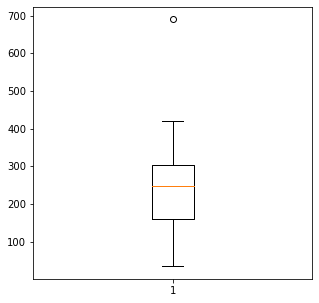

In [6]:
df_EDA = pd.DataFrame()

df_EDA['tweet_text_len'] = [len(i) for i in df.tweet_text]
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df_EDA.tweet_text_len)
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        100 non-null    object
 1   tweet_text       100 non-null    object
 2   username         100 non-null    object
 3   all_hashtags     100 non-null    object
 4   followers_count  100 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [5]:
print('Dataset Shape = {}'.format(df.shape))
#print('Dataset Memory Usage = {:.2f} MB'.format(df.memory_usage().sum() / 1024**2))

Dataset Shape = (100, 5)


### 1.4 Links between this data and other data (e.g. foreign keys, unique ids)

- Username can be unique id to identify the information to merge other dataset. 
- We can distinguish the crediblity by username
- Followers can be useful to aquire this information
- Some people retweet other tweets but use same hashtags
- Hashtags can show key information.
- Time and locations can show when and where was tweeted.

### 1.5 Summary statistics about the data - how many people, what time frame, field averages etc.
    
It's a small dataset. If I can get a bigger one. Maybe we can see more correlations. Here are some distributions to see the structures.


In [7]:
# words
df_EDA['word_count'] = df['tweet_text'].apply(lambda x: len(str(x).split()))
# urls
df_EDA['url_count'] = df['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
# hashtags
df_EDA['hashtag_count'] = df['tweet_text'].apply(lambda x: len([c for c in str(x) if c == '#']))
# mentions
df_EDA['mention_count'] = df['tweet_text'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [8]:
df_EDA.head()

,tweet_text_len,word_count,url_count,hashtag_count,mention_count
0,190,26,0,6,1
1,197,14,1,6,1
2,291,47,0,1,0
3,295,42,0,3,0
4,315,50,1,5,1


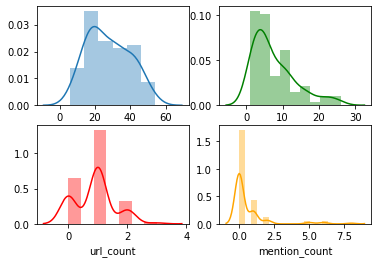

In [9]:
fig, axes = plt.subplots(ncols = 2, nrows = 2)

sns.distplot(df_EDA['word_count'], ax = axes[0][0],)
sns.distplot(df_EDA['url_count'], ax = axes[1][0], color='red')
sns.distplot(df_EDA['hashtag_count'], ax = axes[0][1], color='green')
sns.distplot(df_EDA['mention_count'], ax = axes[1][1], color='orange')

plt.show()

We can see how many tweets in a certain period of time.

In [10]:
#ts = pd.Series(df['timestamp'].values, index=df['timestamp'])
df['timestamp'].value_counts().sort_values()

2020-10-18 10:39:55    1
2020-10-18 10:55:27    1
2020-10-18 10:10:53    1
2020-10-18 10:05:03    1
2020-10-18 10:12:57    1
                      ..
2020-10-18 10:27:58    1
2020-10-18 10:00:23    1
2020-10-18 10:56:25    1
2020-10-18 10:25:40    1
2020-10-18 10:00:22    2
Name: timestamp, Length: 99, dtype: int64

To see who is the most 'Active' user on the topic of #peace.

b'PercievedLogic'     5
b'RealJannaWeiss'     2
b'MelineMuradyan1'    2
b'mark_fearn_art'     2
b'LiorHaiat'          2
                     ..
b'WorldBeyondWar'     1
b'aahaharshh'         1
b'Just4paradise'      1
b'abbakirov'          1
b'TWOsonsTOOmany'     1
Name: username, Length: 92, dtype: int64


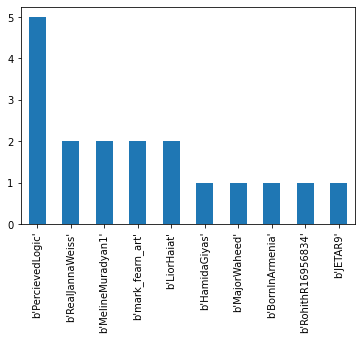

In [11]:
df_user = df['username'].value_counts() #Different sources : 
print(df_user)
df_user.head(10).plot.bar() #Allows us to see the biggest sources and how they are leveled. 

### 1.6 How does the data relate to the questions that the data owner has discussed with you?

- Category or classified data is required: mostly we do some sentiment analysis
- Filter some fake news: need more information

# 2. Data cleaning

### 2.1.1 Remove duplications

In [12]:
df = df.drop_duplicates()

### 2.1.2 Missing values
When it comes to locations, there will be lots of void.Just prepare for it.

In [13]:
df.isna().sum()

timestamp          0
tweet_text         0
username           0
all_hashtags       0
followers_count    0
dtype: int64

## 2.2 Pre-processing text data

Because data holder provide the encoded string to `utf-8`(bytes object),we have to decode `b'`or`b"`prefix to string object. It is still imperfect here but I have no ideas to deal with bytes embeded in string so far.

In [14]:
#import base64
#df['tweet_text'] = df['tweet_text'].apply(lambda x: x.decode("utf-8"))
def clean(text):   
    text = re.sub(r"b'|'",' ', text)
    text = re.sub(r'b"|"',' ', text)
    return text
df['tweet_text'] = df['tweet_text'].apply(lambda x: clean(x))
df['username'] = df['username'].apply(lambda x: clean(x))

In [ ]:
df.head()

### 2.2.1 Normalisation
Here is an example of tweet text:

- ＆amp Truly the most beautiful place for #sunrise @rye_playland_amusement_park #peace #nystrong #canadastrong\xf0\x9f\x87\xa8\xf0 #prayersforavaccine https://t.co/edMipdjrzJ

We can obviously see that in the context of Online Social Network (OSN) Text Data, the emebedded 'noise' includes:

1. Hashtags (Data holder provides seperate hashtags columns so we can drop them)
2. Mentions
3. Emojis
4. URLs, puntuations and whitespaces

Those could appear:

5. HTML entities: ＆lt; ＆gt; ＆amp
6. Contractions and emoticons :)
7. colloquial language(e.g. yessss)


### 2.2.2 Reduce 'noise'
We will specifically use Regular Expression to reduce the noise and save useful information as much as possible.

I remove the HTML Characters and links for Assignment 2 which I can dig out more by `PyQuery` or other modules later.

In [15]:
def reduce_noise(text):
    ##mentions, hashtags, urls and emojis
    text = re.sub(r"#(\w+)",'', text)
    text = re.sub(r"@(\w+)",'', text)
    text = re.sub(r"@[A-Za-z0-9]+",'', text)
    text = re.sub(r"(http|https|ftp)://[a-zA-Z0-9\\./]+",'', text)
    text = re.sub(r'\\x..','',text)
    ##html entities
    text = re.sub(r"&amp;", "&", text)
    text = re.sub(r"&lt;", "<", text)
    text = re.sub(r"&gt;", ">", text)
    text = re.sub(r'[0-9]+', '', text)#'\d+'
    return text

df['tweet_text_prep'] = df['tweet_text'].apply(lambda x: reduce_noise(x))

However, as mentioned above, some charaters are 'utf-8' which are hard to be parsed. There is some ongoing discussions with our data holder to decide whether to drop the emojis or not.So I simply use reguar expression, I leave this blank to see if I can use 'translator' packages to replace emojis with text. 

In [ ]:
df.head()

### 2.2.3 Remove punctuations

In [16]:
def remove_punct(text):
    text = "".join([i for i in text if i not in string.punctuation])
    return text

df['tweet_text_clean'] = df['tweet_text_prep'].apply(lambda x: remove_punct(x))

In [ ]:
df.head()

### 2.2.4 Replace contractions
use `pip install pycontractions` to use this library but still have some work to do.

In [ ]:
#pip install pycontractions

In [ ]:
#from pycontractions import Contractions

### 2.2.5 Replace abbreviations and spelling errors
maybe I need to find a better dictionary.

In [ ]:
#pip install autocorrect

In [ ]:
#from autocorrect import spell
#def correct(text):
    #text = ' '.join([spell(i) for i in text.split()])
    #text = re.sub(r'(.)\1{1.}','',text)
    #return text

## 2.3 Hashtags
Some hashtags are merged words. So we should use some segmenter to extract the key information.There will be some duplicated work so I will mainly show the tweets ore-processing instead.

In [17]:
from wordsegment import load,segment
load()
def seg_hashtag(text):
    text = ' '.join(segment(text))
    return text
df['all_hashtags_seg'] = df['all_hashtags'].apply(lambda x: seg_hashtag(x.lower()))

In [ ]:
df.head()

## 2.4 Feature extraction

### 2.4.1 Tokenization - Converting a sentence into list of words

In [ ]:
#nltk.download('punkt')

In [18]:
from nltk.tokenize import word_tokenize

df['tweet_text_token'] = df['tweet_text_clean'].apply(lambda x: word_tokenize(x.lower()))

In [ ]:
df.head()

### 2.4.2 Remove stopwords

In [ ]:
#nltk.download('stopwords')

In [19]:
from nltk.corpus import stopwords

sw = stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in sw]
    return text

df['tweet_text_nonstop'] = df['tweet_text_token'].apply(lambda x: remove_stopwords(x))

In [ ]:
df.head()

### 2.4.3 Stemming

In [20]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['tweet_text_stem'] = df['tweet_text_nonstop'].apply(lambda x: stemming(x))

In [ ]:
#df.head()

### 2.4.4 Lemmatization

In [ ]:
#nltk.download('wordnet')

In [21]:
wl = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wl.lemmatize(word) for word in text]
    return text

df['tweet_text_lem'] = df['tweet_text_stem'].apply(lambda x: lemmatizer(x))

In [ ]:
df.head()

### 2.4.5 Parts of Speech Tagging (POS) 

In [ ]:
#nltk.download('averaged_perceptron_tagger')

In [22]:
df['tweet_text_pos'] = df['tweet_text_stem'].apply(lambda x: nltk.pos_tag(x))

In [34]:
df.head()

,timestamp,tweet_text,username,all_hashtags,followers_count,tweet_text_prep,tweet_text_clean,all_hashtags_seg,tweet_text_token,tweet_text_nonstop,tweet_text_stem,tweet_text_lem,tweet_text_pos,sentiment
0,2020-10-18 11:15:17,@DailyPostNGR I recall singing a land where ...,KennethKoto3,"['peace', 'justice', 'ENDBADGOVERNANCE', 'EndP...",21,I recall singing a land where and shall r...,I recall singing a land where and shall r...,peace justice end bad governance end police br...,"[i, recall, singing, a, land, where, and, shal...","[recall, singing, land, shall, reign, everyday...","[recal, sing, land, shall, reign, everyday, sc...","[recal, sing, land, shall, reign, everyday, sc...","[(recal, JJ), (sing, NN), (land, NN), (shall, ...",negative
1,2020-10-18 11:15:04,Truly the most beautiful place for #sunrise @...,skconcepts,"['sunrise', 'peace', 'nystrong', 'canadastrong...",11134,Truly the most beautiful place for,Truly the most beautiful place for,sunrise peace ny strong canada strong america ...,"[truly, the, most, beautiful, place, for]","[truly, beautiful, place]","[truli, beauti, place]","[truli, beauti, place]","[(truli, NNS), (beauti, VBD), (place, NN)]",positive
2,2020-10-18 11:13:26,Something funny is happening! No more news of...,supab1902,['Peace'],63,Something funny is happening! No more news of...,Something funny is happening No more news of ...,peace,"[something, funny, is, happening, no, more, ne...","[something, funny, happening, news, boko, hara...","[someth, funni, happen, news, boko, haram, her...","[someth, funni, happen, news, boko, haram, her...","[(someth, NNS), (funni, VBP), (happen, JJ), (n...",neutral
3,2020-10-18 11:12:54,those #files went missing from the metadata w...,PercievedLogic,"['files', 'peace', 'loved']",9300,those went missing from the metadata world &...,those went missing from the metadata world ...,files peace loved,"[those, went, missing, from, the, metadata, wo...","[went, missing, metadata, world, involved, any...","[went, miss, metadata, world, involv, anyway, ...","[went, miss, metadata, world, involv, anyway, ...","[(went, VBD), (miss, JJS), (metadata, NN), (wo...",negative
4,2020-10-18 11:09:20,@ThuliMadonsela3 This tweet touched a nerve w...,given_ngomani,"['Senekal', 'TheSouthAfricaWeWant', 'Senegal',...",30874,This tweet touched a nerve with one of the ...,This tweet touched a nerve with one of the ...,sene kal the south africa we want senegal sant...,"[this, tweet, touched, a, nerve, with, one, of...","[tweet, touched, nerve, one, groups, marked, t...","[tweet, touch, nerv, one, group, mark, territo...","[tweet, touch, nerv, one, group, mark, territo...","[(tweet, NN), (touch, JJ), (nerv, IN), (one, C...",negative


In [ ]:
#df.to_csv("after.csv")

### 2.4.6 Vectorisation

# 3. Explore : 
carry out a deeper exploration of the data. This includes looking at individual fields/variables to see the distribution of values they take (e.g. evenly distributed, bell curves, bi-modal) or how they are distributed in time. It also includes relationships between variables in your dataset: are there correlations? In which direction? Complex curves? We would expect to see roughly:


## 3.1 4-5 exploratory visualisations

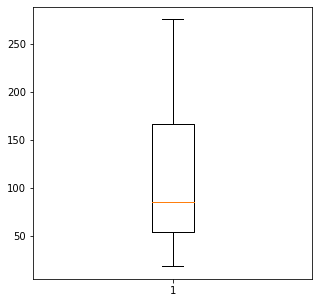

In [23]:
df_EDA['tweet_text_clean_len'] = [len(i) for i in df.tweet_text_prep]

fig, ax = plt.subplots(figsize = (5, 5))
plt.boxplot(df_EDA.tweet_text_clean_len)
plt.show()

We can see that the total number of characters are less than 280 after cleaning.Success!

### 3.1.1 Common Words
We can count the number of the most common words to show the frequencies.I learned some thing like we can color the table to see the difference.

In [24]:
from collections import Counter

corpus = [item for sublist in df['tweet_text_nonstop'] for item in sublist]
counter = Counter(corpus)

df_count = pd.DataFrame(counter.most_common(20))
df_count.columns = ['Common_words','count']
df_count.style.background_gradient(cmap = 'Blues')

,Common_words,count
0,peace,11
1,time,9
2,world,8
3,today,8
4,secret,8
5,want,7
6,get,6
7,come,6
8,day,6
9,u,6


It looks like world is also mentioned many times, peace is always a worldwide thing! Also We can see some shortcomings in my cleaning functions. For example, 'u' stands for 'you'.

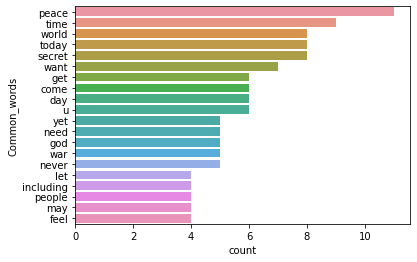

In [25]:
sns.barplot(x = "count",y = "Common_words", data = df_count)
plt.show()

There is also a package to show interactive graphs like treemap, unfortunately I cannot plot on this server. Maybe We can look up later.

In [ ]:
#pip install plotly.express

In [ ]:
#import plotly.express as px

In [ ]:
#fig = px.bar(df_count, x="count", y="Common_words", title='Commmon Words', orientation='h', width=70, height=70,color='Common_words')
#fig.show()

In [ ]:
#fig = px.treemap(df_count, path=['Common_words'], values='count',title='Tree of Most Common Words')
#fig.show()

### 3.1.2 Wordcloud Visualization
Wordcloud is a typical tool in text analysis and we can compare the words in a more straight way.

In [26]:
from wordcloud import WordCloud
from nltk import FreqDist

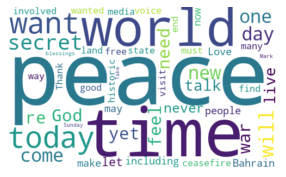

In [27]:
allwords = ' '.join([w for w in df['tweet_text_clean']])
wordcloud = WordCloud(width = 500, height = 300, background_color = 'white', min_font_size = 10, max_words=50).generate(str(allwords))                           
plt.figure(figsize = (5,3))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

Actually, there is also a tool to caculate the frequency in nltk. But there is some difference. WordCloud can remove the stopwords.But stopwords can mean something, for example, I guess people always asked governments 'to' do something when it comes to 'Peace'.

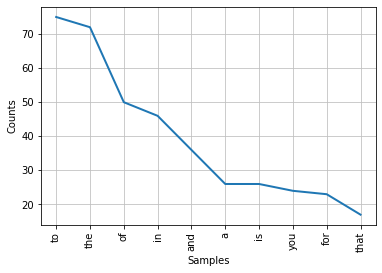

In [28]:
fdist = nltk.FreqDist(allwords.split())
fdist.plot(10)

## 3.2 1-2 relationships between variables analysed

### 3.2.1 Sentiment Analysis
After soing some research, I found that we always create a variable called sentiment to cluster tweets into 3 groups or more. With labelled outputs, we can apply surpervise learning.To have a brief taste, I used `TextBlob` which can output some polarity.

In [29]:
from textblob import TextBlob

def get_tweet_sentiment(text): 
    if TextBlob(text).sentiment.polarity > 0:
        return 'positive'
    elif TextBlob(text).sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [30]:
df['sentiment'] = df['tweet_text_token'].apply(lambda x: get_tweet_sentiment(' '.join(x)))

In [31]:
df.head()

,timestamp,tweet_text,username,all_hashtags,followers_count,tweet_text_prep,tweet_text_clean,all_hashtags_seg,tweet_text_token,tweet_text_nonstop,tweet_text_stem,tweet_text_lem,tweet_text_pos,sentiment
0,2020-10-18 11:15:17,@DailyPostNGR I recall singing a land where ...,KennethKoto3,"['peace', 'justice', 'ENDBADGOVERNANCE', 'EndP...",21,I recall singing a land where and shall r...,I recall singing a land where and shall r...,peace justice end bad governance end police br...,"[i, recall, singing, a, land, where, and, shal...","[recall, singing, land, shall, reign, everyday...","[recal, sing, land, shall, reign, everyday, sc...","[recal, sing, land, shall, reign, everyday, sc...","[(recal, JJ), (sing, NN), (land, NN), (shall, ...",negative
1,2020-10-18 11:15:04,Truly the most beautiful place for #sunrise @...,skconcepts,"['sunrise', 'peace', 'nystrong', 'canadastrong...",11134,Truly the most beautiful place for,Truly the most beautiful place for,sunrise peace ny strong canada strong america ...,"[truly, the, most, beautiful, place, for]","[truly, beautiful, place]","[truli, beauti, place]","[truli, beauti, place]","[(truli, NNS), (beauti, VBD), (place, NN)]",positive
2,2020-10-18 11:13:26,Something funny is happening! No more news of...,supab1902,['Peace'],63,Something funny is happening! No more news of...,Something funny is happening No more news of ...,peace,"[something, funny, is, happening, no, more, ne...","[something, funny, happening, news, boko, hara...","[someth, funni, happen, news, boko, haram, her...","[someth, funni, happen, news, boko, haram, her...","[(someth, NNS), (funni, VBP), (happen, JJ), (n...",neutral
3,2020-10-18 11:12:54,those #files went missing from the metadata w...,PercievedLogic,"['files', 'peace', 'loved']",9300,those went missing from the metadata world &...,those went missing from the metadata world ...,files peace loved,"[those, went, missing, from, the, metadata, wo...","[went, missing, metadata, world, involved, any...","[went, miss, metadata, world, involv, anyway, ...","[went, miss, metadata, world, involv, anyway, ...","[(went, VBD), (miss, JJS), (metadata, NN), (wo...",negative
4,2020-10-18 11:09:20,@ThuliMadonsela3 This tweet touched a nerve w...,given_ngomani,"['Senekal', 'TheSouthAfricaWeWant', 'Senegal',...",30874,This tweet touched a nerve with one of the ...,This tweet touched a nerve with one of the ...,sene kal the south africa we want senegal sant...,"[this, tweet, touched, a, nerve, with, one, of...","[tweet, touched, nerve, one, groups, marked, t...","[tweet, touch, nerv, one, group, mark, territo...","[tweet, touch, nerv, one, group, mark, territo...","[(tweet, NN), (touch, JJ), (nerv, IN), (one, C...",negative


In [32]:
Positive = df[df['sentiment'] == 'positive']
Negative = df[df['sentiment'] == 'negative']
Neutral = df[df['sentiment'] == 'neutral']

In [33]:
print('Number of tweets with positive sentiment', Positive['sentiment'].count())
print('Number of tweets with negative sentiment', Negative['sentiment'].count())
print('Number of tweets with neutral sentiment', Neutral['sentiment'].count())

Number of tweets with positive sentiment 40
Number of tweets with negative sentiment 18
Number of tweets with neutral sentiment 42


Now I use positive as an example to see the difference. To compare it, I should plot all.

In [35]:
pcounter = Counter([item for sublist in Positive['tweet_text_lem'] for item in sublist])
df_positive = pd.DataFrame(pcounter.most_common(10))
df_positive.columns = ['Common_words','count']
df_positive.style.background_gradient(cmap = 'Reds')

,Common_words,count
0,want,6
1,today,5
2,feel,5
3,make,4
4,day,4
5,world,4
6,live,4
7,need,4
8,love,4
9,forgiv,3


There is a beautiful 'donut' plot!

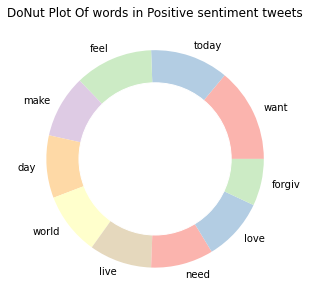

In [36]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize = (5,5))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.rcParams['text.color'] = 'black'
plt.pie(df_positive['count'], labels = df_positive.Common_words, colors = Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of words in Positive sentiment tweets')
plt.show()

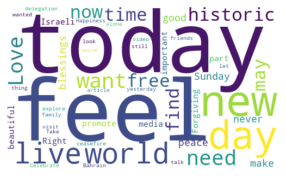

In [37]:
allpositivewords = ' '.join([w for w in Positive['tweet_text_clean']])
wordcloud = WordCloud(width = 500, height = 300, background_color ='white', min_font_size = 10, max_words=50).generate(str(allpositivewords))   
# plot the WordCloud image                        
plt.figure(figsize=(5,3))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3.3 Ideas about trends, outliers, clusters
- Trends: Maybe we can use certain frequency of words to know some disinformation earlier. Maybe some classifer to improve the twitter blocking algorithms?
- Outliers: Some peopel just use the hashtags to have the attention or use some words to tweet ironically or sarcastically. 
- Clusters: Above procedure is a way to cluster the tweets (I think). I have learned some k-means or others to cluster by unigrams or bigrams. If I have the locations, maybe I can cluster the users. I will show some hypothese later.

## 3.4 Reference to statistics
- Some words may become interferences , but we can see certain words relate to certain activities, thoughts or emotions.
- The count of words is also useful data if I can find out more.
- As mentioned above, the number of followers is useful.
- Hashtags can work as keywords but it contains some misleadings.

# 4. Reflect and Hypothesise:
What do you think might be behind the relationships and distributions that you have found? How does your data relate to the world? In short, what hypotheses came up as you explored the data, and how would you go about testing them? We would expect to see:
-  A 200 word reflection on the data

## 4.1 Reflection
The data I got from the data holder was not complete so far. For a tweet, there is text (including emojis), mentions, hashtags and URLs. Data linked to tweets can include timestamp and followers relationship to draw some network or maps. Maybe we can use the size or emojis on maps to represent the live difference using Twitter API.

It took me a couple of days to do the data cleaning which consists of most of my work. And it's hard to know the suitable function.But I still need to improve my function in case the bigger dataset will be more complicated. Some algorithms need more time for me to be understood.I still have some questions about unique word.

To do this kind of data analysis, I should always keep up with the latest news. Like I thought the text content of a Tweet can contain up to 140 characters but this number has already changed to 280. The most challenging part is converting between bytes, string and list. If I ignore the types, I will come across bugs.

Our group has talked about the form of data visualization, which can be in multiple ways. Further discussions about the models we use will be put forward at the same time.

I know there are some interesting packages I can turn to. But somehow it cannot work so far, let's wait for next assignment!

In [ ]:
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#Analyser = SentimentIntensityAnalyzer()
#import spacy

#model = spacy.load('en_core_web_sm')

## 4.2 Hypothese
-  3-5 hypotheses with an explanation of:
    - What your hypothesis is
    - why you think that (referring to your graphs)
    - How you could go about testing it (note that this may include: further studies,asking the data owner, using some advanced algorithms, checking each datapoint individually, etc..)
    
NOTE: You don’t have to actually test the hypotheses - you just have to demonstrate that you have plausibly thought about how you would test them.

### Hypothese 1:
It is our goal to find out the fake news. I assume that account with more followers will be more official voice sometimes. So for next step, we can rank the username by its followers, verified or not. We can even collect a list of public news media.So we can do in different directions, for example, I can train the dataset use machine learing and compare the results with twitter's verified token.

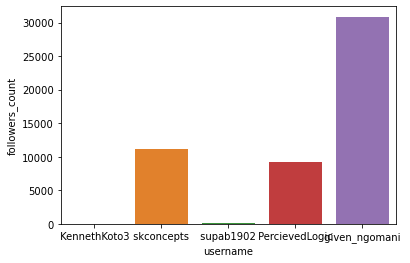

In [41]:
sns.barplot(x = 'username',y = 'followers_count', data = df.head())
plt.show()

### Hypothese 2:
Clustering? Once we have combine our dataset together, we should draw some map to show what people are discussing in the real world. We have some ideas like Chernoff faces to balance the relevance. I assume that there will be certain topics or emotions in some conflicting areas. For graphs, you can refer to **Sentiment Analysis** part.Twitter has some search system by locations or hashtags, we can compare maunally feelings or new about what's going on with our results. What we need to do next is:
- Figure out what visulisation tools can be used, how to draw the map
- Find better algorithms to custer the dataset (like k-means, tf-idf?) Do some dimension reduction (word embeding)
- Maybe we can use several models to compare the result


### Hypothese 3:
Our tutor provide a file which have a list of terms on peace agreements. I guess I can create some dictionary to categorize the certain tweets.And I can compare it with my most common words to test the relationshiop with terms. It is a huge work, I haven't done it.Some example codes:

In [ ]:
#terms = ['','']
#corpus = [item for sublist in df['tweet_text_nonstop'] for item in sublist]
#df_count[''] = df['tweet_text_nonstop'].apply(lambda x: [i for i in x if i in terms])

### Hypothese 4:
Actually, we cannot get information from single word so there is also research about unigram, bigrams and trigrams. Some phrase can indicate certain activity or more simply the name of some protests and parade. To show it, I have used some simple `split()` function here. We can do more later!

In [42]:
from collections import defaultdict
from wordcloud import STOPWORDS
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Bigrams
text_bigrams = defaultdict(int)

for text in df['tweet_text_clean']:
    for word in generate_ngrams(text, n_gram=2):
        text_bigrams[word] += 1

df_bigrams = pd.DataFrame(sorted(text_bigrams.items(), key=lambda x: x[1])[::-1])
df_bigrams.columns = ['bigrams','count']

In [43]:
df_bigrams.head()

,bigrams,count
0,want u,4
1,u want,4
2,yet come,3
3,ones yet,3
4,s dion,2
